# Lab 3: ATLAS Data Analysis

## Margaret Haswell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.stats as st

In [2]:
# delcaring constants

m_z = 91.1880 # GeV/c^2
m_z_unc = 0.0020 # GeV/c^2

m_w = 80.3692 # GeV/c^2
m_w_unc = 0.0133 # GeV/c^2

m_H = 125.20 # GeV/c^2
m_H_unc = 0.11 # GeV/c^2

m_e = 0.51099895000 # Mev/c^2
m_e_unc = 0.00000000015 # Mev/c^2

m_m = 105.6583755 # Mev/c^2
m_m_unc = 0.0000023 # Mev/c^2

m_T = 1776.93 # Mev/c^2
m_T_unc = 0.09 # Mev/c^2

### Part 1: The Invariant Mass Distribution

In [3]:
# load data, find the masses

data = np.genfromtxt("atlas_z_to_ll.csv", delimiter = ",", skip_header = 1)

pt1 = data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

px1 = pt1*np.cos(phi1)
py1 = pt1*np.sin(phi1)
pz1 = pt1*np.sinh(eta1)

px2 = pt2*np.cos(phi2)
py2 = pt2*np.sin(phi2)
pz2 = pt2*np.sinh(eta2)

px = px1 + px2
py = py1 + py2
pz = pz1 + pz2
E = E1 + E2

M = np.sqrt(E**2 - (px**2 + py**2 + pz**2))
print(f"The masses are: {M}")

The masses are: [92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


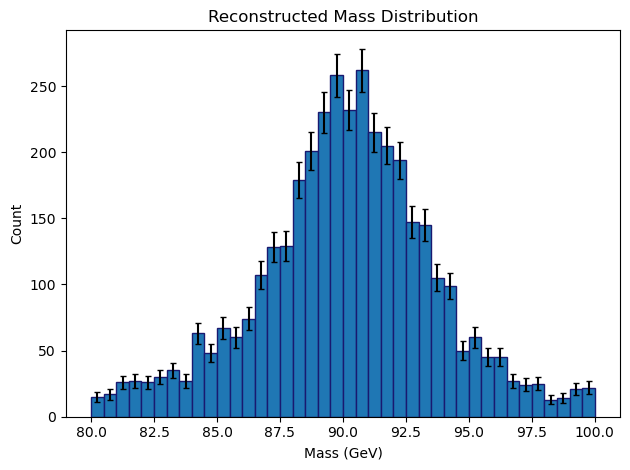

In [4]:
# make histogram

fig1, ax1 = plt.subplots(1,1)
bins = np.linspace(80, 100, 41)
counts, bins, patches = ax1.hist(M, bins = bins, edgecolor = "midnightblue")
ax1.set_xlabel("Mass (GeV)")
ax1.set_ylabel("Count")
ax1.set_title("Reconstructed Mass Distribution")

M_err = np.sqrt(counts)
centers = np.zeros(40)

for i in range(40):
    centers[i] = (bins[i] + bins[i+1])/2

ax1.errorbar(centers, counts, yerr = M_err, ls = "", capsize = 2.5, color = "black")
fig1.tight_layout()

### Part 2: Breit_Wigner Fit

In [5]:
# define decay function

def normalized_decays(m, m0, gamma):
    D = (1/np.pi)*(gamma/2)/((m-m0)**2 + (gamma/2)**2)
    return 2500*D

# create new arrays for the fit 

mask = (centers > 87) & (centers < 93)
centers_mask = centers[mask] # mass
counts_mask = counts[mask] # counts
M_err_mask = M_err[mask] # error in counts
params, covar = curve_fit(f = normalized_decays, xdata = centers_mask, ydata = counts_mask, sigma = M_err_mask, absolute_sigma = True)
m0 = params[0]
gamma = params[1]

errs = np.sqrt(np.diag(covar))
m0_unc = errs[0]
gamma_unc = errs[1]

print(f"fitted m0: {m0} +/- {m0_unc}")
print(f"fitted Gamma: {gamma} +/- {gamma_unc}")

fitted m0: 90.34080586023876 +/- 0.09351482701955657
fitted Gamma: 6.390998388435173 +/- 0.18107387652700305


In [6]:
# evaluate the fit

dof = len(centers_mask) - 2

residuals = counts_mask - normalized_decays(centers_mask, m0, gamma)
chisq = np.sum(residuals**2/M_err_mask**2)
red_chisq = chisq/dof
pval = st.chi2.sf(chisq, dof)

print(f"degrees of freedom: {dof}")
print(f"chi^2: {chisq}")
print(f"reduced chi^2: {red_chisq}")
print(f"p-value: {pval}")

degrees of freedom: 10
chi^2: 9.985097164263756
reduced chi^2: 0.9985097164263756
p-value: 0.44180173856272487


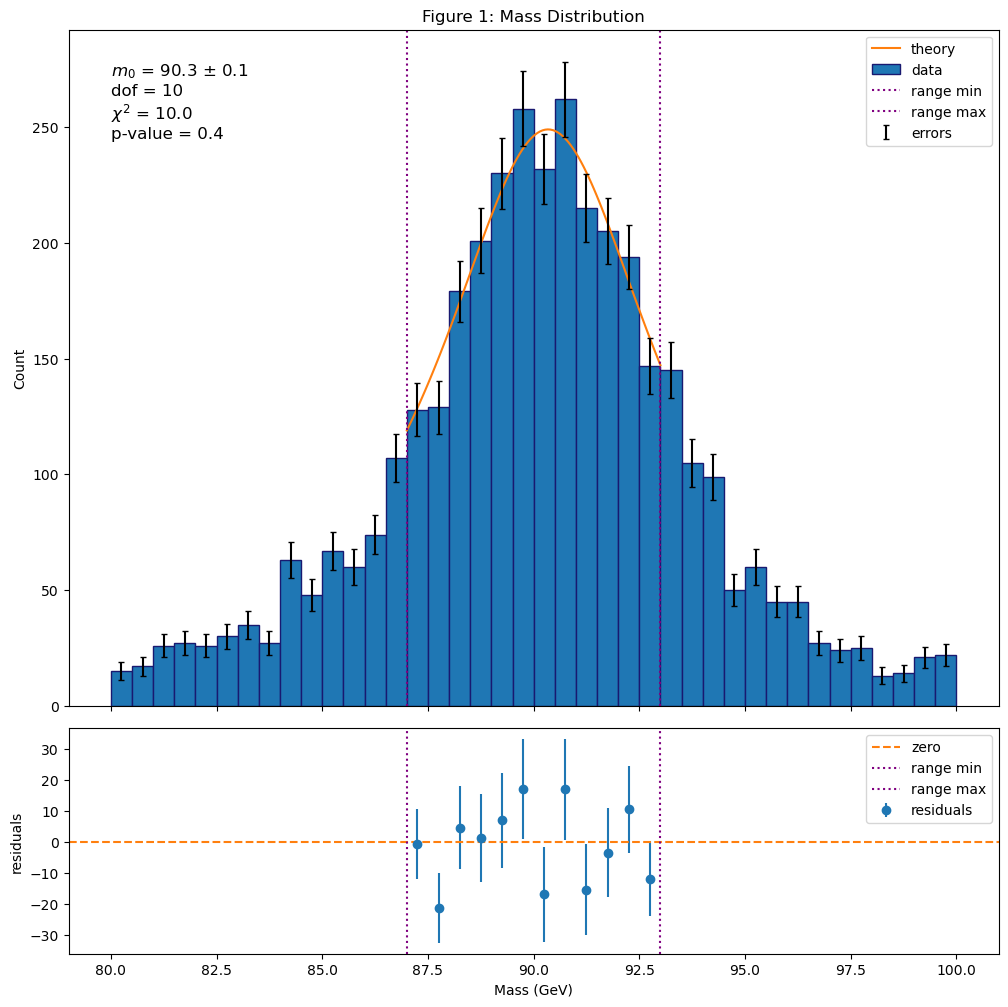

In [7]:
# graph fitted distribution

M_fit = np.linspace(87, 93, 100)
counts_fit = normalized_decays(M_fit, m0, gamma)

fig2, (ax_top, ax_bot) = plt.subplots(2, 1, sharex = True, figsize = (12,12), gridspec_kw = {'height_ratios': [3,1], 'hspace' :0.05})
ax_top.plot(M_fit, counts_fit, color = "C1", label = "theory") # theory
ax_top.hist(M, bins = bins, label = "data", edgecolor = "midnightblue") # data
ax_top.errorbar(centers, counts, yerr = M_err, ls = "", color = "black", capsize = 2.5, label = "errors") # data uncertainties
ax_top.axvline(87, color = "purple", ls = ":", label = "range min")
ax_top.axvline(93, color = "purple", ls = ":", label = "range max")
ax_bot.set_xlabel("Mass (GeV)")
ax_top.set_ylabel("Count")
ax_top.set_title("Figure 1: Mass Distribution")
ax_top.legend()
ax_top.text(80, 245, r"$m_0$ = 90.3 $\pm$ 0.1" "\n"
                     "dof = 10\n"
                     r"$\chi^2$ = 10.0""\n"
                     "p-value = 0.4",
                     fontsize = 12)

ax1.set_xlabel("Mass (GeV)") # data
ax1.set_ylabel("Count")
ax1.set_title("Mass")

ax_bot.errorbar(centers_mask, residuals, yerr = M_err_mask, fmt = "o", color = "C0", label = "residuals")
ax_bot.axhline(0, color = "C1", ls = "--", label = "zero")
ax_bot.axvline(87, color = "purple", ls = ":", label = "range min")
ax_bot.axvline(93, color = "purple", ls = ":", label = "range max")
ax_bot.set_ylabel("residuals")
ax_bot.legend();

fig2.savefig("Figure1.png")

Fig. 1: The decay distribution of a collision which decayed into a lepton pair. The fitted particle mass is 90.2 $\pm$ 0.1 GeV. The fit has 10 degrees of freedom, a $\chi^2$ value of 10.0, and a p-value of 0.4, indicating this theory is a good fit to the data. 

### Part 3: 2D Parameter Contours

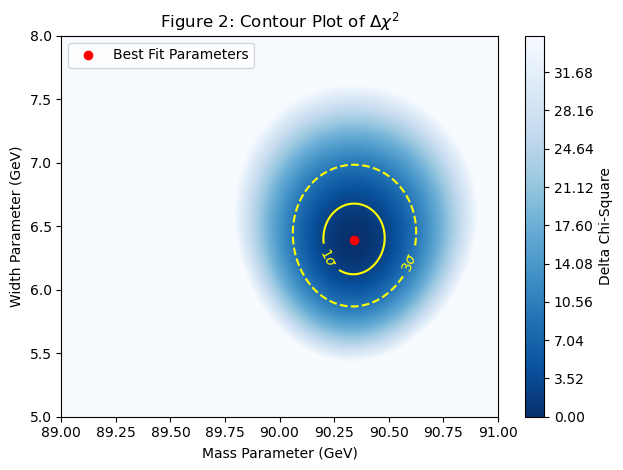

In [8]:
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
m0_scan = np.linspace(89, 91, n_bins)
gamma_scan = np.linspace(5, 8, n_bins)

# the double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = normalized_decays(centers_mask, m0_scan[i], gamma_scan[j])
        chi2 = np.sum((theory - counts_mask)**2/M_err_mask**2)
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min + 35)
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(m0_scan,gamma_scan)
fig3, ax3 = plt.subplots(1,1)
cs = ax3.contourf(X, Y, delta_chi_map, 500, cmap = "Blues_r")
cbar = fig3.colorbar(cs, ax = ax3)
cbar.set_label("Delta Chi-Square")

levels = [2.3, 9.21]
CS = ax3.contour(X, Y, delta_chi_map, levels = levels, colors = ["yellow", "yellow"], linestyles = ["solid", "dashed"])
ax3.set_xlabel("Mass Parameter (GeV)")
ax3.set_ylabel("Width Parameter (GeV)")
ax3.set_title(r"Figure 2: Contour Plot of $\Delta\chi^2$")

fmt = {}
strs = ['$1\\sigma$', '$3\\sigma$']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax3.clabel(CS, CS.levels, fmt=fmt, fontsize=10)

ax3.scatter(m0, gamma, color = "red", marker = "o", label = "Best Fit Parameters")
ax3.legend(loc = "upper left")
fig3.tight_layout()

fig3.savefig("Figure2.png")

In [9]:
# comparing our value to literature value

diff = m_z - m0
diff_unc = np.sqrt(m0_unc**2 + m_z_unc**2)

print(f"The difference between the literature value of m0 and our measured value is {diff} +/- {diff_unc} GeV")

The difference between the literature value of m0 and our measured value is 0.8471941397612426 +/- 0.09353621155732997 GeV
